In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("Shopping Mall Customer Segmentation Data .csv")
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [6]:
df_clean = df.drop(columns=['Customer ID', 'Gender'])
df_clean.head()

,Age,Annual Income,Spending Score
0,30,151479,89
1,58,185088,95
2,62,70912,76
3,23,55460,57
4,24,153752,76


In [12]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [13]:
df.rename(columns={
    df.columns[3]: 'Income',
    df.columns[4]: 'Spending'
}, inplace=True)

X = df[['Income', 'Spending']]


In [17]:
X = df[['Income','Spending']]


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


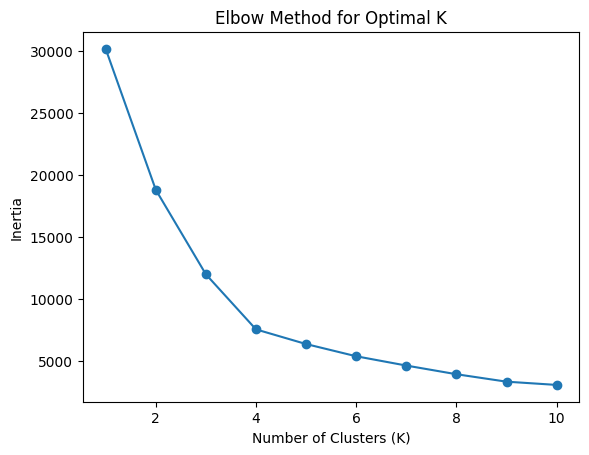

In [20]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
You will clearly see an elbow around K = 5

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [22]:
df['Cluster'] = clusters
df.head()

,Customer ID,Age,Gender,Income,Spending,Cluster
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,2
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,2
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,4
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,4
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,2


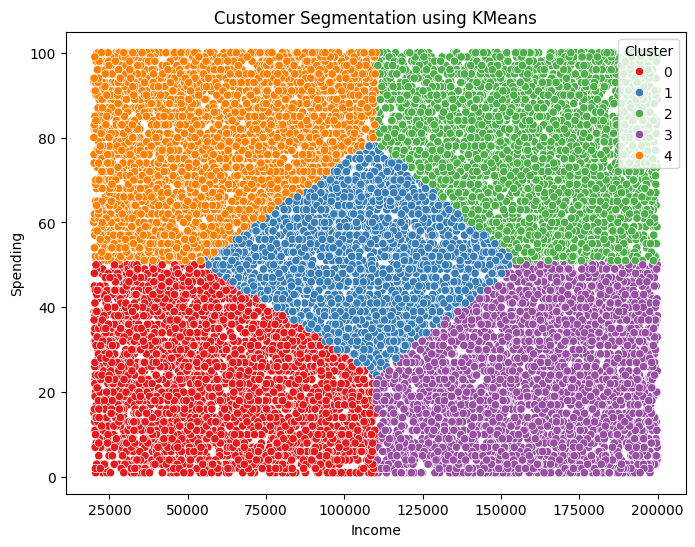

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Income',
    y='Spending',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title("Customer Segmentation using KMeans")
plt.show()


In [ ]:
### Cluster Interpretation

- Cluster 0: Low income, low spending – Budget customers
- Cluster 1: High income, high spending – Premium customers
- Cluster 2: Low income, high spending – Impulsive buyers
- Cluster 3: High income, low spending – Careful customers
- Cluster 4: Average income and spending – Standard customers


In [25]:
df.to_csv("segmented_customers_task12.csv", index=False)